# ForwardDiff.jl

[ForwardDiff.jl](https://github.com/JuliaDiff/ForwardDiff.jl) is one of a few AD tools in the [JuliaDiff](http://www.juliadiff.org/) project.  They also have reverse accumulation and dual number packages.  Dual numbers are used internally in ForwardDiff to accumulate derivatives, instead of parsing the source code for a function.

[Documentation for ForwardDiiff.jl](http://www.juliadiff.org/ForwardDiff.jl/)

In [1]:
using ForwardDiff
using PyPlot

    write(Base.IO, ForwardDiff.Partials) at /home/james/.julia/v0.4/ForwardDiff/src/partials.jl:57
is ambiguous with: 
    write(Base.Base64.Base64EncodePipe, AbstractArray{UInt8, 1}) at base64.jl:89.
To fix, define 
    write(Base.Base64.Base64EncodePipe, ForwardDiff.Partials{N<:Any, UInt8})
before the new definition.


## Example 1
Let's use the function we considered previously:

$$ f(x_1,x_2) = x_1x_2 + \sin(x_1).$$

In [2]:
f1(x) = x[1]*x[2] + sin(x[1]);

In [3]:
f1([1;2])

2.8414709848078967

Using ForwardDiff.jl, it's super simple to get a gradient function and evaluate it:

In [4]:
Df1 = x -> ForwardDiff.gradient(f1, x);
Df1_check(x) = [x[2] + cos(x[1]); x[1]];

In [5]:
Df1([1;2])

2-element Array{Float64,1}:
 2.5403
 1.0   

In [6]:
Df1_check([1;2])

2-element Array{Float64,1}:
 2.5403
 1.0   

## Example 2
A more complicated function.  Using ForwardDiff, the target function must be unary (i.e., accept only a single argument) and only involve numbers of type `T<:Real`.

In [7]:
function f2(x)
    function localfun(x)
        return exp(x)
    end
    
    if x[3] > 0
        y = x[3]*x[1:2]
    else
        y = localfun(x[1:2])
    end
    return y
end

f2 (generic function with 1 method)

In [8]:
Df2 = x -> ForwardDiff.jacobian(f2, x);

In [9]:
Df2([1;2;0]) # exp

2x3 Array{Float64,2}:
 2.71828  0.0      0.0
 0.0      7.38906  0.0

In [10]:
Df2([1;2;pi]) # 

2x3 Array{Float64,2}:
 3.14159  0.0      1.0
 0.0      3.14159  2.0

## Example 3
An iterative function

In [31]:
function f3(x)
    srand(271828)
    y = 0
    while randn() < 2
        y += x^randn()
    end
    return y
end

f3 (generic function with 1 method)

In [32]:
Df3 = n -> ForwardDiff.derivative(f3,n);

In [33]:
f3(10.)

346.0621581497236

In [34]:
Df3(10.)

65.13256679647421

## Example 4
This is weird...

In [26]:
function f4(n)
    function collatz(n)
        # https://en.wikipedia.org/wiki/Collatz_conjecture
        #if n % 2 == 0
        if round(n/2) == n/2
            return n/2
        else
            return 3*n+1
        end
    end
    
    seq = [n]
    while n > 1
        n = collatz(n)
        push!(seq, n)
    end
    
    return mean(seq)
end

f4 (generic function with 1 method)

In [27]:
Df4 = n -> ForwardDiff.derivative(f3,n);

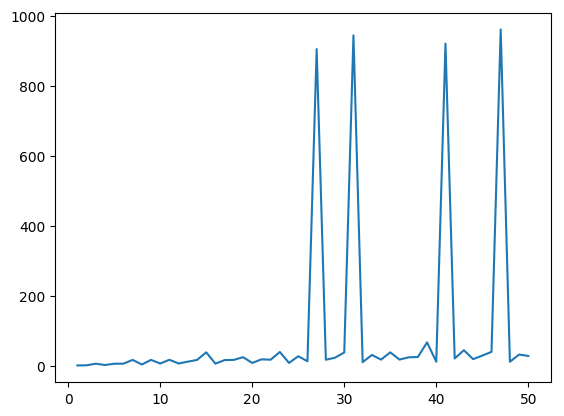

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f0958943320>

In [28]:
nvec = 1:50;
f4vec = [f4(n) for n in nvec];
plot(nvec, f4vec)

In [29]:
f4(27)

905.7142857142857

In [30]:
Df4(27)

-0.5367565344950324